In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data science Datasets/Copper_Set.xlsx - Result 1.csv")

<ipython-input-2-6ee039ae6437>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/Data science Datasets/Copper_Set.xlsx - Result 1.csv")


In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.shape

(181673, 14)

In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

#Data Jar

1)Structured Data - YES

In [ ]:
#Proper data format - No, Mixed

df.dtypes

,0
id,object
item_date,float64
quantity tons,object
customer,float64
country,float64
status,object
item type,object
application,float64
thickness,float64
width,float64


In [ ]:
#Missing values

df.isna().sum()

,0
id,2
item_date,1
quantity tons,0
customer,1
country,28
status,2
item type,0
application,24
thickness,1
width,0


In [ ]:
#deleting unwanted columns
df=df.drop(columns=['id','customer'])

In [ ]:
#As the missing values percentange not exceeds more than 70%, we can keep all the column.

missing_percentage = df.isna().sum()/df.shape[0]*100
missing_percentage

,0
item_date,0.000550
quantity tons,0.000000
country,0.015412
status,0.001101
item type,0.000000
application,0.013211
thickness,0.000550
width,0.000000
material_ref,42.889697
product_ref,0.000000


In [ ]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df['country']=median_imputer.fit_transform(df[['country']])
df['application']=median_imputer.fit_transform(df[['application']])

In [ ]:
df.isna().sum()

,0
item_date,1
quantity tons,0
country,0
status,2
item type,0
application,0
thickness,1
width,0
material_ref,77919
product_ref,0


In [ ]:
#Removing rows with low values.

df=df.dropna(subset=['item_date','status','thickness','delivery date','selling_price'])

In [ ]:
#As per documentation, remove unwanted values from status column
df=df[~df['status'].isin(['Not lost for AM','Revised','To be approved','Draft','Offered','Offerable','Wonderful'])]
df.status.value_counts()/df.shape[0]*100

,count
status,
Won,77.110572
Lost,22.889428


XX----------------Imbalanced Dataset-------------XX


In [ ]:
df.shape

(150445, 12)

In [ ]:
df.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,20210401.0,202.411065,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,20210401.0,785.526262,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
#Removing Duplicates
df=df.drop_duplicates()
df.shape

(150445, 12)

In [ ]:
#Data cleaning each column
df['country'].unique()
df['country'] = df['country'].astype(str).str.replace('.0','')
df['country'].astype(int)
df['country'].head()


,country
0,28
1,25
2,30
3,32
4,28


In [ ]:
#Data cleaning each column
df['application'].unique()
df['application'] = df['application'].astype(str).str.replace('.0','')
df['application'].astype(int)
df['application'].head()

,application
0,10
1,41
2,28
3,59
4,10


In [ ]:
#Data cleaning each column

df['item_date'] = df['item_date'].astype(str)
df['item_date']=df['item_date'].str.replace('.0','')

df['delivery date'] = df['delivery date'].astype(str)
df['delivery date']=df['delivery date'].str.replace('.0','')


In [ ]:
df['item_date']=df['item_date'].str[:4]+'-'+df['item_date'].str[4:6]+'-'+df['item_date'].str[6:]
df['delivery date']=df['delivery date'].str[:4]+'-'+df['delivery date'].str[4:6]+'-'+df['delivery date'].str[6:]

df[['item_date','delivery date']]

,item_date,delivery date
0,2021-04-01,2021-07-01
1,2021-04-01,2021-04-01
2,2021-04-01,2021-01-01
3,2021-04-01,2021-01-01
4,2021-04-01,2021-03-01
...,...,...
181668,2020-07-02,2020-07-01
181669,2020-07-02,2020-07-01
181670,2020-07-02,2020-07-01
181671,2020-07-02,2020-07-01


In [ ]:
#checking date outliers
df['item_date'].sort_values(ascending=True).head(5),df['delivery date'].sort_values(ascending=True).head(5)

(52        1995-00-00
 105485    2019-19-19
 180755    2020-07-02
 180756    2020-07-02
 180757    2020-07-02
 Name: item_date, dtype: object,
 36532     2019-04-01
 43189     2019-07-01
 12343     2019-07-01
 180392    2020-01-01
 120331    2020-01-01
 Name: delivery date, dtype: object)

In [ ]:
df['item_date'].sort_values(ascending=False).head(5),df['delivery date'].sort_values(ascending=False).head(5)

(0      2021-04-01
 432    2021-04-01
 454    2021-04-01
 455    2021-04-01
 456    2021-04-01
 Name: item_date, dtype: object,
 2515    2022-01-01
 2523    2022-01-01
 3231    2022-01-01
 3229    2022-01-01
 3233    2022-01-01
 Name: delivery date, dtype: object)

In [ ]:
#Removing the Improper date
def validate_date(date):
    try:
        # Split the date into year, month, and day
        year, month, day = map(int, date.split('-'))

        # Apply conditions
        if 2019 < year < 2022 and 1 <= month <= 12 and 1 <= day <= 31:
            return True
        else:
            return False
    except ValueError:
        return False

In [ ]:
df['valid_item'] = df['item_date'].apply(validate_date)
df['valid_delivery'] = df['delivery date'].apply(validate_date)

In [ ]:
df.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,valid_item,valid_delivery
0,2021-04-01,54.151139,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,True,True
1,2021-04-01,768.024839,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,True,True
2,2021-04-01,386.127949,30,Won,WI,28,0.38,952.0,S0380700,628377,2021-01-01,644.33,True,True
3,2021-04-01,202.411065,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,True,True
4,2021-04-01,785.526262,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,True,True


In [ ]:
df=df[(df['valid_item']==True) & (df['valid_delivery'] == True)]

In [ ]:
df.shape

(150433, 14)

In [ ]:
df['item_date'] = df['item_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['delivery date'] = df['delivery date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
df[['item_date','delivery date']]

,item_date,delivery date
0,2021-04-01,2021-07-01
1,2021-04-01,2021-04-01
2,2021-04-01,2021-01-01
3,2021-04-01,2021-01-01
4,2021-04-01,2021-03-01
...,...,...
181668,2020-07-02,2020-07-01
181669,2020-07-02,2020-07-01
181670,2020-07-02,2020-07-01
181671,2020-07-02,2020-07-01


In [ ]:
df.drop(columns=['valid_item','valid_delivery'],inplace=True)

In [ ]:
df.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30,Won,WI,28,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,2021-04-01,202.411065,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [ ]:
df['df_date_diff']=df['delivery date']-df['item_date']
df['date_diff_int']=df['df_date_diff'].dt.days
df['date_difference'] = df['date_diff_int']

In [ ]:
df.sort_values(by='date_difference',ascending=True)

,item_date,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,df_date_diff,date_diff_int,date_difference
68585,2021-01-06,44.076824,25,Won,W,66,8.00,1500.0,84470002A5LF42ATL,1670798778,2020-01-01,797.0,-371 days,-371,-371
75520,2020-12-16,503.937486,78,Lost,W,41,0.50,1250.0,D819U,611993,2020-01-01,916.0,-350 days,-350,-350
76914,2020-12-15,42.918246,25,Won,W,66,6.00,1516.0,03940002A35F42SID,1670798778,2020-01-01,571.0,-349 days,-349,-349
76916,2020-12-15,47.115552,25,Won,W,66,10.00,1500.0,03940002A35F42ATL,1670798778,2020-01-01,584.0,-349 days,-349,-349
76912,2020-12-15,45.743303,25,Won,W,66,8.00,1500.0,03940002A35F42SID,1670798778,2020-01-01,581.0,-349 days,-349,-349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44894,2021-02-03,753.003775,26,Lost,S,41,1.20,906.0,NaN,1668701718,2021-10-01,1105.0,240 days,240,240
44896,2021-02-03,184.501659,26,Lost,S,41,1.20,904.0,NaN,1668701718,2021-10-01,1105.0,240 days,240,240
145902,2020-09-09,24.93251313,84,Won,S,42,0.19,29.0,0000000000000000000000000000000092910039,611728,2021-12-01,2100.0,448 days,448,448
145914,2020-09-09,269.5105106,84,Won,S,42,0.19,29.0,0000000000000000000000000000000092910035,611728,2021-12-01,1869.0,448 days,448,448


In [ ]:
#Removing unused columns
df=df.drop(columns=['item_date','delivery date','df_date_diff','date_diff_int'])

In [ ]:
df.head()

,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,date_difference
0,54.151139,28,Won,W,10,2.00,1500.0,DEQ1 S460MC,1670798778,854.00,91
1,768.024839,25,Won,W,41,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1047.00,0
2,386.127949,30,Won,WI,28,0.38,952.0,S0380700,628377,644.33,-90
3,202.411065,32,Won,S,59,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,-90
4,785.526262,28,Won,W,10,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,-31


In [ ]:
df.dtypes

,0
quantity tons,object
country,object
status,object
item type,object
application,object
thickness,float64
width,float64
material_ref,object
product_ref,int64
selling_price,float64


In [ ]:
#Removing letters data from quantity_tons
df = df[~df['quantity tons'].str.contains(r'[A-Za-z]', na=False)]


In [ ]:
#quantity_tons cannot be in negative
df['quantity tons']=df['quantity tons'].astype(str).str.replace('-','')

<ipython-input-38-af900cbabe04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity tons']=df['quantity tons'].astype(str).str.replace('-','')


In [ ]:
#Thinckness cannot be large values, restricting as per data given
df=df[~(df['thickness'] > 100)]

In [ ]:
#selling price cannot be negative
df['selling_price']=df['selling_price'].astype(str).str.replace('-','')

<ipython-input-40-ffd944d45c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selling_price']=df['selling_price'].astype(str).str.replace('-','')


In [ ]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')

In [ ]:
df.dtypes

,0
quantity tons,float64
country,int64
status,object
item type,object
application,int64
thickness,float64
width,float64
material_ref,object
product_ref,int64
selling_price,float64


In [ ]:
#outliers

for column in ['quantity tons','country','application','thickness','width','selling_price','date_difference']:
  iqr=df[column].quantile(0.75)-df[column].quantile(0.25)
  upper_bound=df[column].quantile(0.75)+1.5*iqr
  lower_bound=df[column].quantile(0.25)-1.5*iqr
  print(f"Lower bound:{lower_bound},upper bound:{upper_bound}")
  df[column]=df[column].clip(lower_bound,upper_bound)
  print(df[column].describe())
  print()

Lower bound:-70.54824644374999,upper bound:146.10677940624998
count    150430.000000
mean         47.840163
std          46.470305
min           0.000010
25%          10.697388
50%          29.934145
75%          64.861145
max         146.106779
Name: quantity tons, dtype: float64

Lower bound:-52.0,upper bound:156.0
count    150430.000000
mean         45.387735
std          24.486634
min          25.000000
25%          26.000000
50%          30.000000
75%          78.000000
max         113.000000
Name: country, dtype: float64

Lower bound:-36.5,upper bound:87.5
count    150430.000000
mean         25.185934
std          17.607059
min           2.000000
25%          10.000000
50%          15.000000
75%          41.000000
max          87.500000
Name: application, dtype: float64

Lower bound:-2.6499999999999995,upper bound:6.39
count    150430.000000
mean          2.282549
std           1.890046
min           0.180000
25%           0.740000
50%           1.500000
75%           3.000000
ma

In [ ]:
#EDA - Explorartory Data Analysis

In [ ]:
df['status'] = df['status'].map({'Lost':0,'Won':1})

In [ ]:
df.tail(50)

,quantity tons,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,date_difference
181623,9.295007,25,1,W,41.0,0.69,1220.0,NaN,611993,793.0,-1
181624,8.812642,25,1,W,41.0,0.41,1220.0,NaN,611993,835.0,-1
181625,2.659505,25,1,W,41.0,0.41,1220.0,NaN,611993,827.0,-1
181626,6.874355,25,1,W,41.0,0.42,1220.0,NaN,611993,830.0,-1
181627,6.398036,25,1,W,41.0,0.42,1220.0,NaN,611993,828.0,-1
181628,4.495433,25,1,W,41.0,0.45,1220.0,NaN,611993,852.0,-1
181629,1.659942,25,1,W,41.0,0.69,1220.0,NaN,611993,784.0,-1
181630,8.606471,25,1,W,41.0,0.45,1000.0,NaN,611993,868.0,-1
181631,0.671656,25,1,W,41.0,0.45,1220.0,NaN,611993,847.0,-1
181632,146.106779,25,1,W,41.0,0.45,1220.0,NaN,611993,847.0,-1


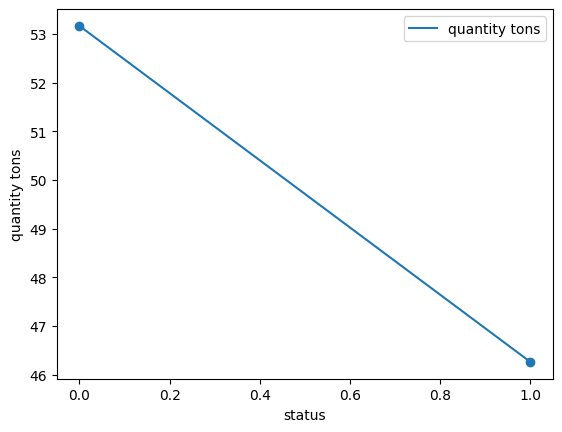

correlation_value:-0.062431017570071336


In [ ]:
#Both columns have good corelation

grouped=df.groupby('status')['quantity tons'].mean().reset_index()
df.groupby('status')['quantity tons'].mean().reset_index().plot(kind='line',x='status',y='quantity tons')
plt.scatter(grouped['status'],grouped['quantity tons'])
plt.xlabel('status')
plt.ylabel('quantity tons')
plt.show()
correlation=df['status'].corr(df['quantity tons'])
print(f'correlation_value:{correlation}') #Good coorelation

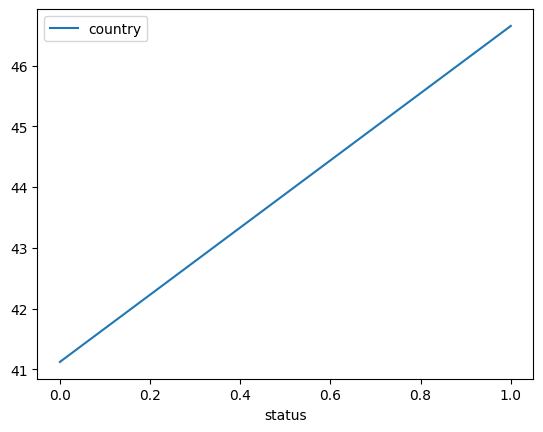

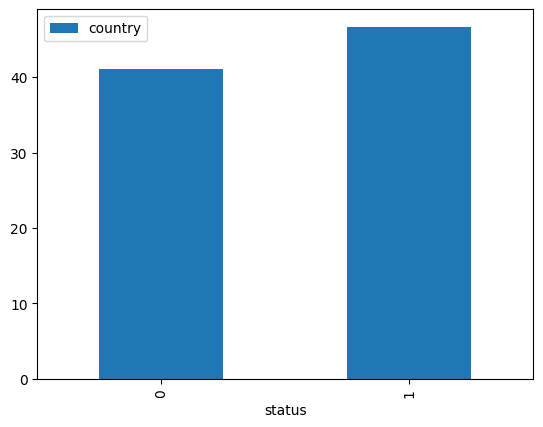

correlation_value:0.09494003085786291


In [ ]:
bar_plot=df.groupby('country')['status'].mean().reset_index().sort_values(by='status',ascending=True)
df.groupby('country')['status'].mean().reset_index().plot(kind='line',x='status',y='country')
bar_plot.plot(kind='bar',x='status',y='country')
correlation_value=df["status"].corr(df["country"])
plt.show()
print(f"correlation_value:{correlation_value}") #Good coorelation


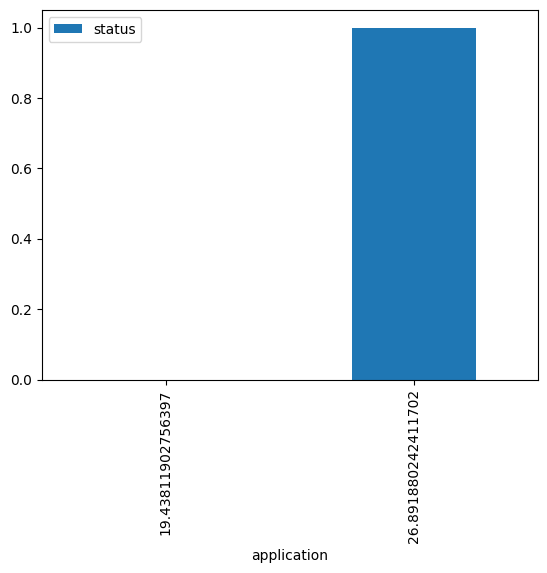

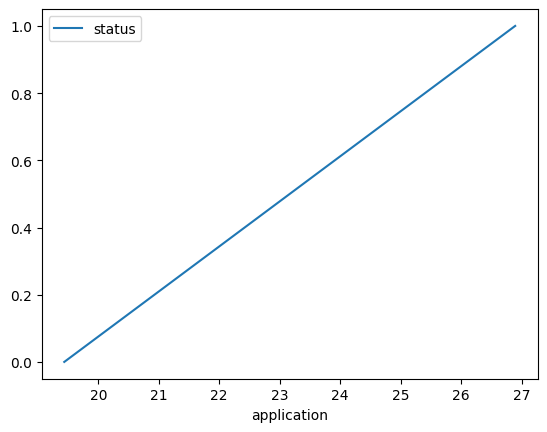

correlation_value:0.17784788773923207


In [ ]:
df.groupby('application')['status'].mean().reset_index().plot(kind='bar',x='application',y='status')
df.groupby('application')['status'].mean().reset_index().plot(kind='line',x='application',y='status')
correlation_value=df["status"].corr(df["application"])
plt.show()
print(f"correlation_value:{correlation_value}") #poor-coorelation

correlation_value:-0.17593689839389354


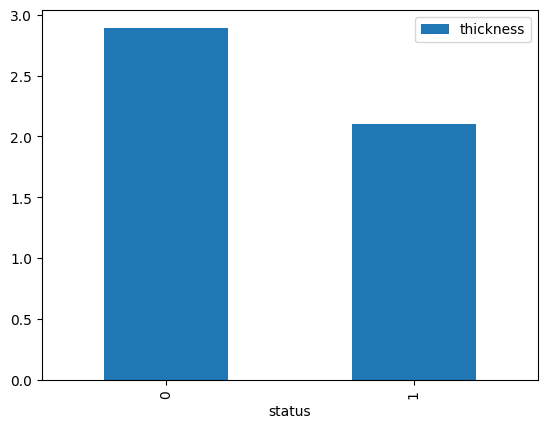

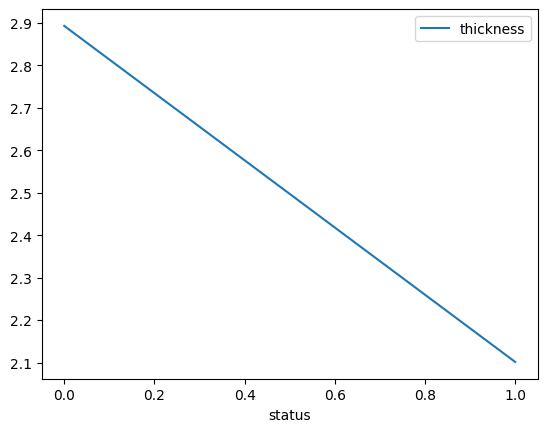

In [ ]:
df.groupby('status')['thickness'].mean().reset_index().plot(kind='bar',x='status',y='thickness')
df.groupby('status')['thickness'].mean().reset_index().plot(kind='line',x='status',y='thickness')
correlation_value=df["status"].corr(df["thickness"])
print(f"correlation_value:{correlation_value}") #Average co-relation

correlation_value:-0.12570673804017596


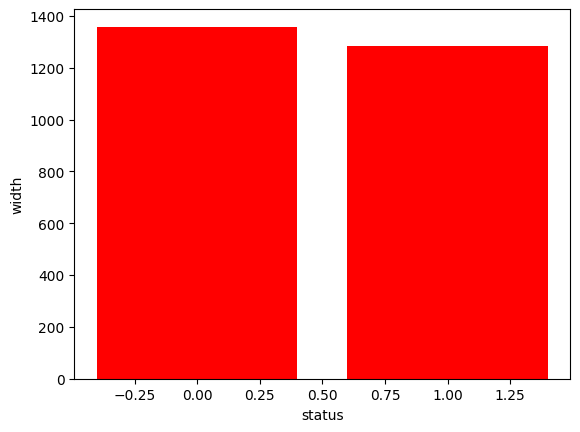

<Figure size 800x500 with 0 Axes>

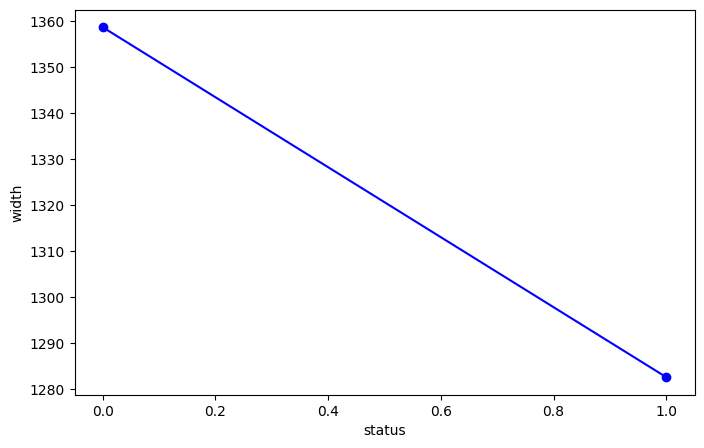

In [ ]:
w1=df.groupby('status')['width'].mean().reset_index()
plt.bar(w1['status'],w1['width'],color='red')
plt.xlabel('status')
plt.ylabel('width')
plt.figure(figsize=(8, 5))
w2=df.groupby('status')['width'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(w2['status'],w2['width'],color='blue',linestyle='-',marker='o')
plt.xlabel('status')
plt.ylabel('width')
correlation_value=df["status"].corr(df["width"])
print(f"correlation_value:{correlation_value}") #poor co-relation

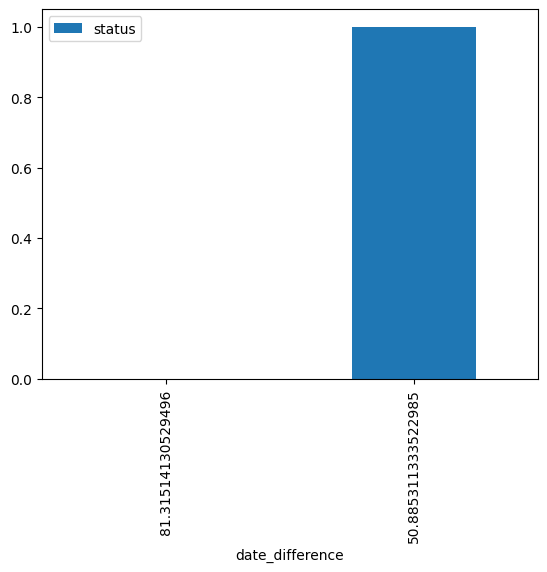

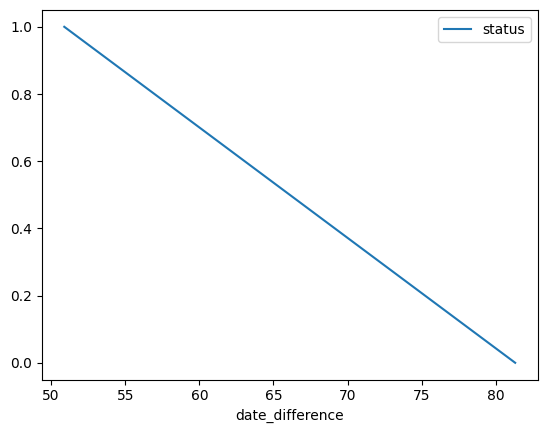

correlation_value:-0.2805936082197533


In [ ]:
df.groupby('status')['date_difference'].mean().reset_index().plot(kind='bar',x='date_difference',y='status')
df.groupby('status')['date_difference'].mean().reset_index().plot(kind='line',x='date_difference',y='status')
correlation_value=df["status"].corr(df["date_difference"])
plt.show()
print(f"correlation_value:{correlation_value}") #Not Good co-relation

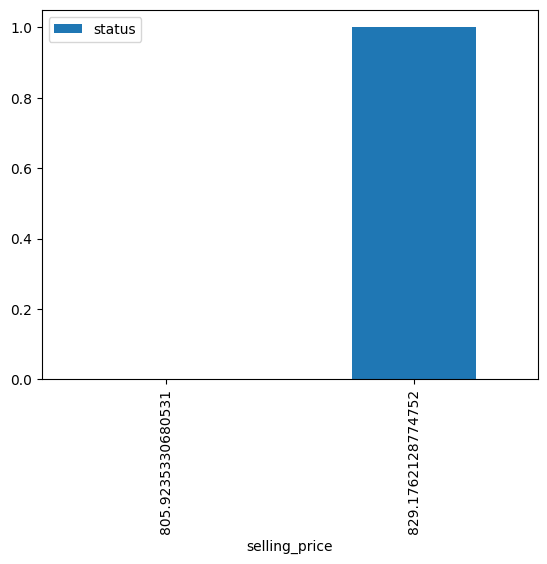

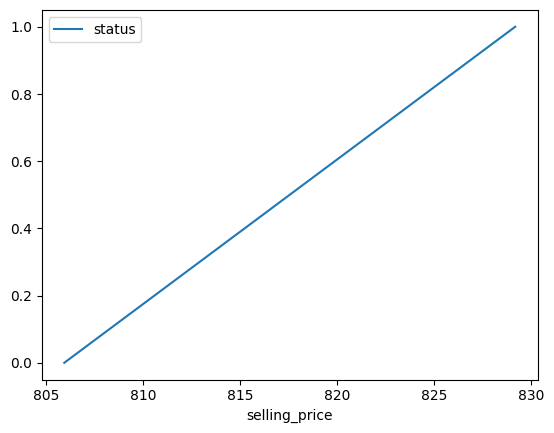

In [ ]:
df.groupby('status')['selling_price'].mean().reset_index().plot(kind='bar',x='selling_price',y='status')
df.groupby('status')['selling_price'].mean().reset_index().plot(kind='line',x='selling_price',y='status')
plt.show()

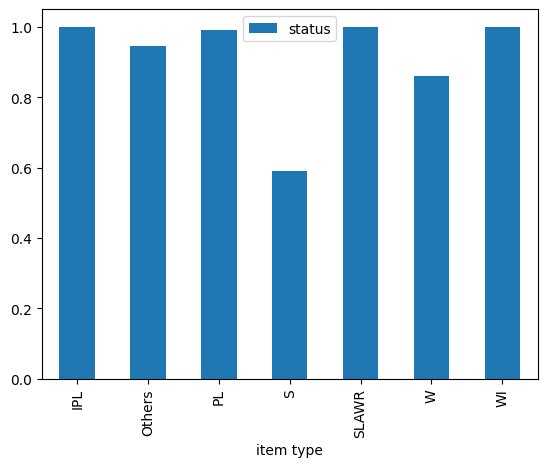

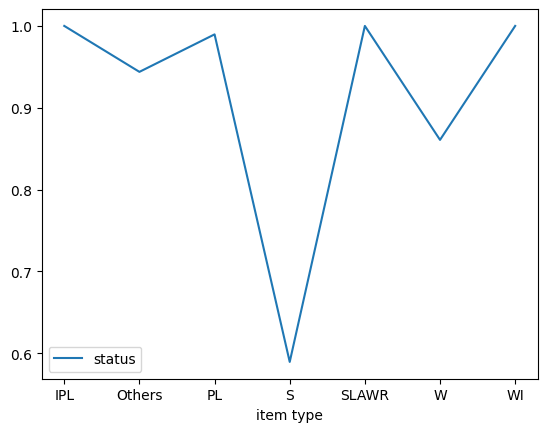

In [ ]:
df_sorted1=df.groupby('item type')['status'].mean().reset_index().sort_values(by='item type',ascending=True)
df_sorted2=df.groupby('item type')['status'].mean().reset_index().sort_values(by='item type',ascending=True)
df_sorted1.plot(kind='bar',x='item type', y = 'status')
df_sorted2.sort_values(by='item type',ascending=True).plot(kind='line',x='item type', y = 'status')
plt.show()

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
item_encoder=LabelEncoder()
df['item type']=item_encoder.fit_transform(df['item type'])

In [ ]:
import pickle
with open('country_encoder.pkl','wb') as f:
  pickle.dump(item_encoder,f)

In [ ]:
df['status'].corr(df['item type']) #Not good correlation

0.2343970281305215

In [ ]:
df['material_ref'].unique()

array(['DEQ1 S460MC', '0000000000000000000000000000000000104991',
       'S0380700', ..., 'MAS65270', 'MAS65550', '202006170005.IO.1.1'],
      dtype=object)

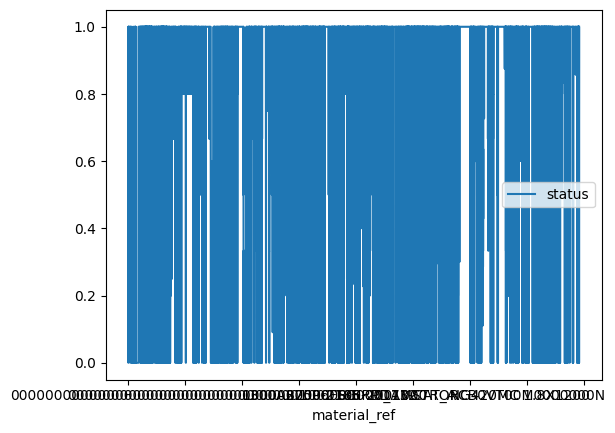

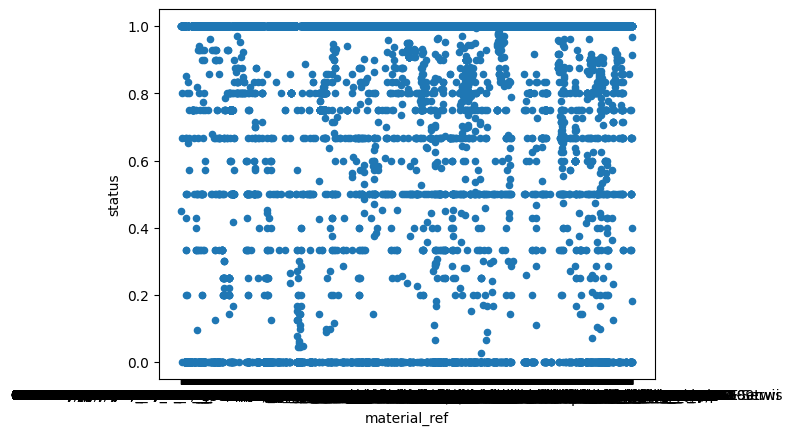

In [ ]:
mrf=df.groupby('material_ref')['status'].mean().reset_index()
mrf.plot(kind='line',x='material_ref',y='status')
mrf.plot(kind='scatter',x='material_ref',y='status')
plt.show()

In [ ]:
df['material_ref']=df['material_ref'].fillna(df['material_ref'].mode()[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
material_encoder=LabelEncoder()
df['material_ref']=material_encoder.fit_transform(df['material_ref'])

In [ ]:
with open('material_encoded.pkl','wb') as f:
  pickle.dump(material_encoder,f)

In [ ]:
df['status'].corr(df['material_ref']) #Good correlation

-0.015401281978679762

In [ ]:
df.isna().sum(),df.shape,df.dtypes

(quantity tons      0
 country            0
 status             0
 item type          0
 application        0
 thickness          0
 width              0
 material_ref       0
 product_ref        0
 selling_price      0
 date_difference    0
 dtype: int64,
 (150430, 11),
 quantity tons      float64
 country              int64
 status               int64
 item type            int64
 application        float64
 thickness          float64
 width              float64
 material_ref         int64
 product_ref          int64
 selling_price      float64
 date_difference      int64
 dtype: object)

EDA Relationship After Encoding

<Axes: >

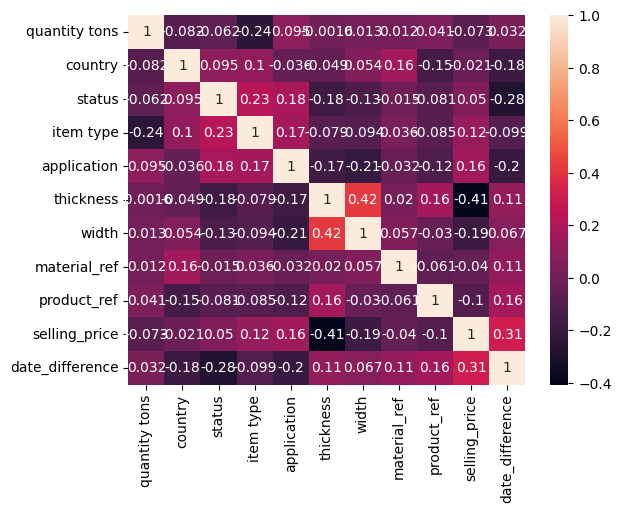

In [ ]:
sns.heatmap(data=df.corr(), annot=True)


<Axes: xlabel='country', ylabel='selling_price'>

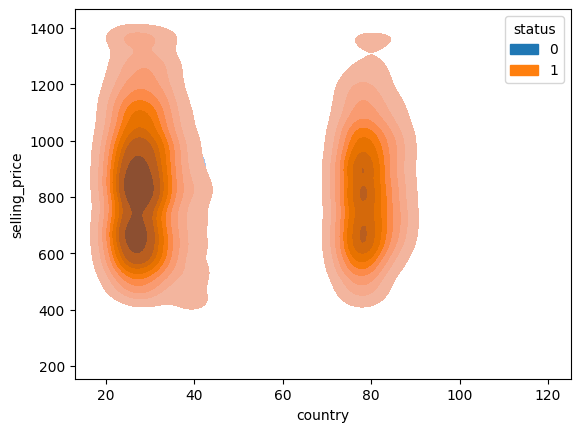

In [ ]:
sns.kdeplot(data=df, x='country', y='selling_price', hue='status', fill=True)

<Axes: xlabel='application', ylabel='selling_price'>

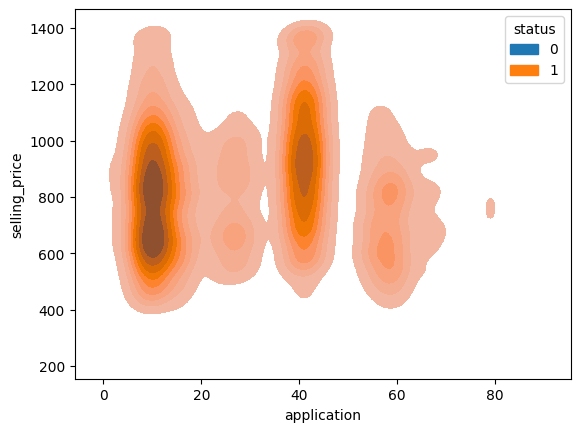

In [ ]:
sns.kdeplot(data=df, x='application', y='selling_price', hue='status', fill=True)

<Axes: xlabel='thickness', ylabel='selling_price'>

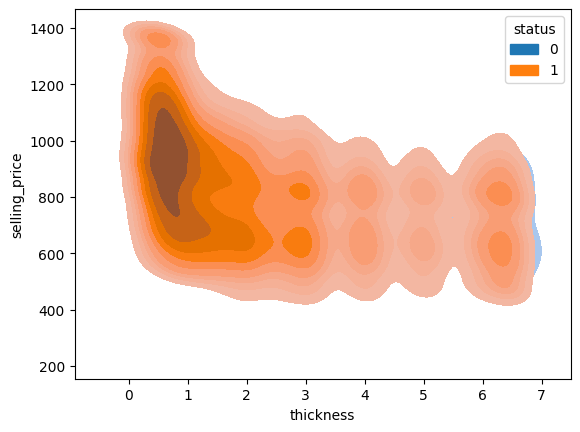

In [ ]:
sns.kdeplot(data=df, x='thickness', y='selling_price', hue='status', fill=True)

<Axes: xlabel='width', ylabel='selling_price'>

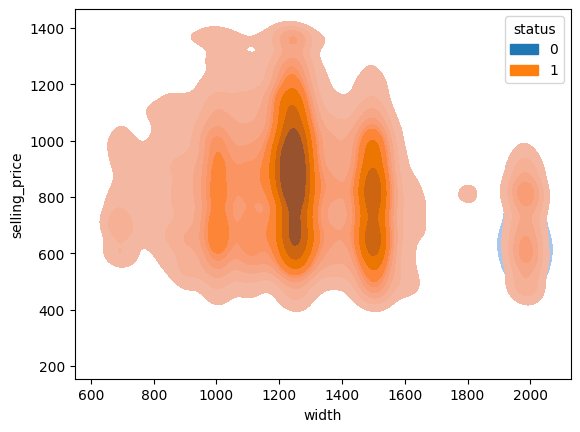

In [ ]:
sns.kdeplot(data=df, x='width', y='selling_price', hue='status', fill=True)

<Axes: xlabel='date_difference', ylabel='selling_price'>

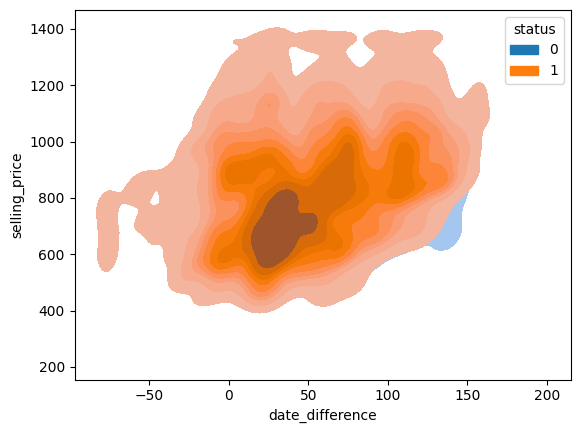

In [ ]:
sns.kdeplot(data=df, x='date_difference', y='selling_price', hue='status', fill=True)

<Axes: xlabel='item type', ylabel='selling_price'>

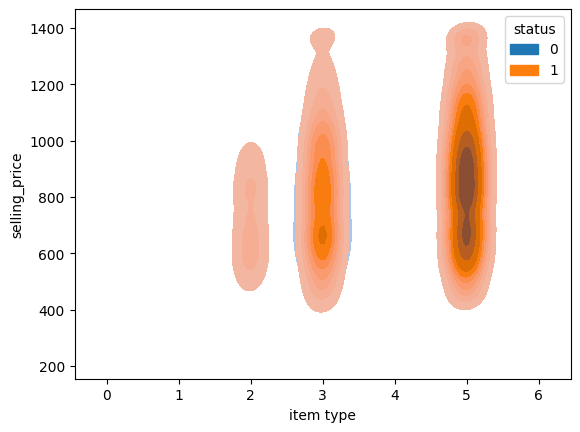

In [ ]:
sns.kdeplot(data=df, x='item type', y='selling_price', hue='status', fill=True)

<Axes: xlabel='material_ref', ylabel='selling_price'>

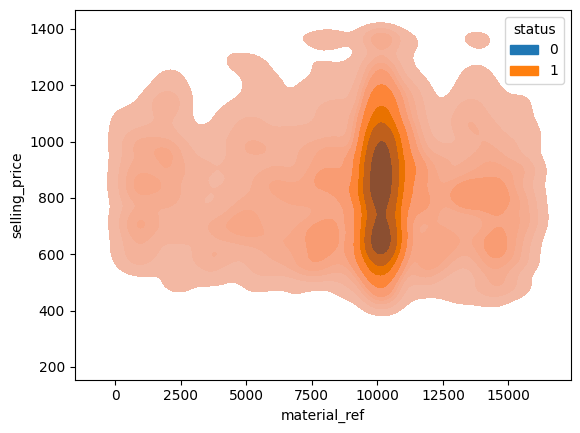

In [ ]:
sns.kdeplot(data=df, x='material_ref', y='selling_price', hue='status', fill=True)

<Axes: xlabel='quantity tons', ylabel='selling_price'>

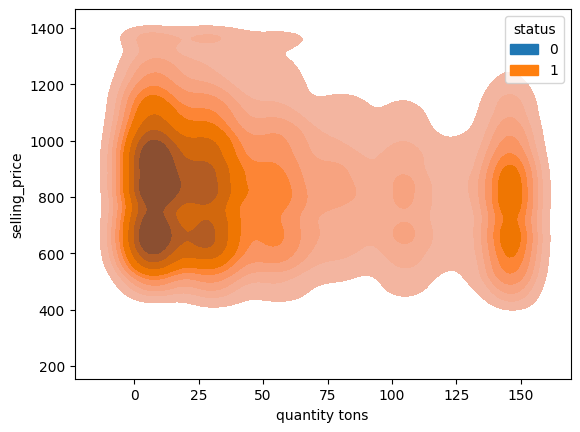

In [ ]:
sns.kdeplot(data=df, x='quantity tons', y='selling_price', hue='status', fill=True)

Spliting - # imbalanced dataset

In [ ]:
df[df['status']==1].shape,df[df['status']==0].shape #working with imbalanced dataset

((116001, 11), (34429, 11))

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['status'])
y=df['status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((112822, 10), (37608, 10), (112822,), (37608,))

In [ ]:
X_train.head()

,quantity tons,country,item type,application,thickness,width,material_ref,product_ref,selling_price,date_difference
41167,5.743275,25,5,26.0,4.0,1123.0,12048,164141591,999.0,141
151916,4.683961,78,5,41.0,1.0,1250.0,10153,611993,754.0,30
18789,25.349154,28,5,10.0,6.0,1310.0,13410,640665,835.0,112
103567,134.475294,27,5,59.0,4.5,1250.0,11728,640665,542.0,15
20569,40.535037,78,5,41.0,0.6,1100.0,11564,611993,1317.0,23


1)Eventhough the accuracy score is high, it can be misleading, because its an imbalanced data set.

2)F1 score is also high because its predicts postive values correctly, because the dataset has 70% has positive values.

3)classification report explains the clear cut information fo the dataset.

4)Confustion matrix predicts and captures the true and false values.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)}") #Accuracy
print(f"f1 score: {f1_score(y_test,y_pred)}") #f1 score
print(f"classification_report:\n {classification_report(y_test,y_pred)}") #classification report
print(f"confusion_matrix:{confusion_matrix(y_test,y_pred)}") #confusion_matrix

Accuracy : 0.7738247181450755
f1 score: 0.8724928796282416
classification_report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      8506
           1       0.77      1.00      0.87     29102

    accuracy                           0.77     37608
   macro avg       0.39      0.50      0.44     37608
weighted avg       0.60      0.77      0.68     37608

confusion_matrix:[[    0  8506]
 [    0 29102]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#since its a imbalanced database, we are balancing the dataset using smoteenn
from imblearn.combine import SMOTEENN
smote=SMOTEENN()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTEENN or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.valida

In [ ]:
y_train_resampled.value_counts()  #Imbalanced dataset to balanced dataset

,count
status,
0,77699
1,70214


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

lr=LogisticRegression()
lr.fit(X_train_resampled,y_train_resampled)
y_pred=lr.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"f1_score : {f1_score(y_test,y_pred)}")
print(f"classification report:\n {classification_report(y_test,y_pred)}")
print(f"confusion matrix: {confusion_matrix(y_test,y_pred)}")

Accuracy : 0.5551478408849181
f1_score : 0.66569418911358
classification report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.34      8506
           1       0.80      0.57      0.67     29102

    accuracy                           0.56     37608
   macro avg       0.52      0.53      0.50     37608
weighted avg       0.67      0.56      0.59     37608

confusion matrix: [[ 4221  4285]
 [12445 16657]]


In [ ]:
import pickle
with open('logistic_model.pkl','wb') as f:
  pickle.dump(lr,f)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
for depth in range(1,11):
  dt_model=DecisionTreeClassifier(max_depth=depth)
  dt_model.fit(X_train_resampled,y_train_resampled)
  y_pred=dt_model.predict(X_test)
  cross_val=np.mean(cross_val_score(dt_model,X_train_resampled,y_train_resampled,cv=10))
  print(f"depth:{depth}, accuracy:{accuracy_score(y_test,y_pred)},cross_val_score:{cross_val},f1 score: {f1_score(y_test,y_pred)}")

depth:1, accuracy:0.5432620718995959,cross_val_score:0.6987418948654661,f1 score: 0.6044626614778824
depth:2, accuracy:0.7501063603488619,cross_val_score:0.7201129797186024,f1 score: 0.8324836904210189
depth:3, accuracy:0.7232769623484365,cross_val_score:0.755971805498052,f1 score: 0.8043024502153105
depth:4, accuracy:0.7359072537757924,cross_val_score:0.773799881010184,f1 score: 0.8141188800718671
depth:5, accuracy:0.7284886194426717,cross_val_score:0.7870033961387144,f1 score: 0.8044206937501197
depth:6, accuracy:0.7184641565624336,cross_val_score:0.8079481701394211,f1 score: 0.7914598597652249
depth:7, accuracy:0.7322378217400554,cross_val_score:0.8298123938632379,f1 score: 0.8019354077337634
depth:8, accuracy:0.7448149329929802,cross_val_score:0.8463018353179047,f1 score: 0.8111533088018261
depth:9, accuracy:0.7934747925973197,cross_val_score:0.8718911497311431,f1 score: 0.8524590163934426
depth:10, accuracy:0.8075409487343118,cross_val_score:0.8874475534524506,f1 score: 0.86302562

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
for depth in range(11,21):
  dt_model=DecisionTreeClassifier(max_depth=depth)
  dt_model.fit(X_train_resampled,y_train_resampled)
  y_pred=dt_model.predict(X_test)
  cross_val=np.mean(cross_val_score(dt_model,X_train_resampled,y_train_resampled,cv=10))
  print(f"depth:{depth}, accuracy:{accuracy_score(y_test,y_pred)},cross_val_score:{cross_val},f1 score: {f1_score(y_test,y_pred)}")

depth:11, accuracy:0.8308072750478621,cross_val_score:0.905600134178916,f1 score: 0.8814973461216128
depth:12, accuracy:0.8453254626675175,cross_val_score:0.9219813377553091,f1 score: 0.8926534905608149
depth:13, accuracy:0.8651616677302701,cross_val_score:0.9346915412435441,f1 score: 0.9073603829079815
depth:14, accuracy:0.8706658157838758,cross_val_score:0.9437711919300756,f1 score: 0.9111727966689799
depth:15, accuracy:0.8824452244203361,cross_val_score:0.9515122108444544,f1 score: 0.9198266325734907
depth:16, accuracy:0.888507764305467,cross_val_score:0.9572723196311733,f1 score: 0.9243236414171495
depth:17, accuracy:0.896059349074665,cross_val_score:0.9609704422635211,f1 score: 0.9297536255323737
depth:18, accuracy:0.900659434162944,cross_val_score:0.9633366885070617,f1 score: 0.9331663685152057
depth:19, accuracy:0.9022282493086577,cross_val_score:0.9654122398185585,f1 score: 0.9342888289222081
depth:20, accuracy:0.9061901723037652,cross_val_score:0.9660206864098397,f1 score: 0.9

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
for depth in range(21,31):
  dt_model=DecisionTreeClassifier(max_depth=depth)
  dt_model.fit(X_train_resampled,y_train_resampled)
  y_pred=dt_model.predict(X_test)
  cross_val=np.mean(cross_val_score(dt_model,X_train_resampled,y_train_resampled,cv=10))
  print(f"depth:{depth}, accuracy:{accuracy_score(y_test,y_pred)},cross_val_score:{cross_val},f1 score: {f1_score(y_test,y_pred)}")

depth:21, accuracy:0.9064294830887045,cross_val_score:0.9669266395351945,f1 score: 0.9373676248108926
depth:22, accuracy:0.908423739629866,cross_val_score:0.9673390419765809,f1 score: 0.9388146674246731
depth:23, accuracy:0.9095671133801319,cross_val_score:0.9677041233689863,f1 score: 0.9396611372305509
depth:24, accuracy:0.9103648159965965,cross_val_score:0.968075961515925,f1 score: 0.9402485066557953
depth:25, accuracy:0.9105775366943204,cross_val_score:0.9679880716018712,f1 score: 0.9403987594151528
depth:26, accuracy:0.9089555413741757,cross_val_score:0.9681841303777651,f1 score: 0.9393488503914692
depth:27, accuracy:0.9109497979153371,cross_val_score:0.9679880821143081,f1 score: 0.9406784164378709
depth:28, accuracy:0.9103116358221655,cross_val_score:0.968075966543612,f1 score: 0.9402554156260516
depth:29, accuracy:0.9118804509678792,cross_val_score:0.9680827191845831,f1 score: 0.9413472089483558
depth:30, accuracy:0.9107104871303978,cross_val_score:0.9677852505866944,f1 score: 0.

since the depth 27 has high accuracy and cross val score we are selecting the depth 27

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

dt_model=DecisionTreeClassifier(max_depth=27)
dt_model.fit(X_train_resampled,y_train_resampled)
y_pred=dt_model.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"f1_score : {f1_score(y_test,y_pred)}")
print(f"score : {model.score(X_test,y_test)}")
print(f"classification report:\n {classification_report(y_test,y_pred)}")
print(f"confusion matrix: {confusion_matrix(y_test,y_pred)}")

Accuracy : 0.911268878961923
f1_score : 0.9409349168982424
score : 0.7738247181450755
classification report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82      8506
           1       0.97      0.91      0.94     29102

    accuracy                           0.91     37608
   macro avg       0.86      0.91      0.88     37608
weighted avg       0.92      0.91      0.91     37608

confusion matrix: [[ 7691   815]
 [ 2522 26580]]


In [ ]:
with open('decision_tree_model.pkl','wb') as f:
  pickle.dump(dt_model,f)

In [ ]:
   from sklearn.ensemble import RandomForestClassifier
   from sklearn.model_selection import cross_val_score
   from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

   for n_estimators in range(10,101,10):
     rf_model=RandomForestClassifier(n_estimators=n_estimators)
     rf_model.fit(X_train_resampled,y_train_resampled)
     y_pred=rf_model.predict(X_test)
     print(f"n_estimators:{n_estimators}, accuracy:{accuracy_score(y_test,y_pred)},f1 score: {f1_score(y_test,y_pred)}")

n_estimators:10, accuracy:0.9194320357370772,f1 score: 0.9460085531004989
n_estimators:20, accuracy:0.9249627738778983,f1 score: 0.949932581080122
n_estimators:30, accuracy:0.9278079132099554,f1 score: 0.9519324398491582
n_estimators:40, accuracy:0.9274888321633695,f1 score: 0.9517439082656474
n_estimators:50, accuracy:0.9281801744309721,f1 score: 0.9522209053439705
n_estimators:60, accuracy:0.928446075303127,f1 score: 0.9523927465723131
n_estimators:70, accuracy:0.9286587960008509,f1 score: 0.9525359562686858
n_estimators:80, accuracy:0.9294564986173155,f1 score: 0.9530998638782329
n_estimators:90, accuracy:0.9298819400127633,f1 score: 0.9534008376186185
n_estimators:100, accuracy:0.9288183365241438,f1 score: 0.9526638728272594


In [ ]:
rf_model=RandomForestClassifier(n_estimators=80)
rf_model.fit(X_train_resampled,y_train_resampled)
y_pred=rf_model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"f1_score : {f1_score(y_test,y_pred)}")
print(f"score : {model.score(X_test,y_test)}")
print(f"classification report:\n {classification_report(y_test,y_pred)}")
print(f"confusion matrix: {confusion_matrix(y_test,y_pred)}")

Accuracy : 0.9295096787917464
f1_score : 0.9531086937295481
score : 0.7738247181450755
classification report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86      8506
           1       0.98      0.93      0.95     29102

    accuracy                           0.93     37608
   macro avg       0.88      0.93      0.91     37608
weighted avg       0.94      0.93      0.93     37608

confusion matrix: [[ 8015   491]
 [ 2160 26942]]


In [ ]:
with open('random_forest_model.pkl','wb') as f:
  pickle.dump(rf_model,f)

In [ ]:
X_train.columns

Index(['quantity tons', 'country', 'item type', 'application', 'thickness',
       'width', 'material_ref', 'product_ref', 'selling_price',
       'date_difference'],
      dtype='object')

REGRESSION MODEL

Splitting Train and Test

In [ ]:
#Arranging the columns according to Regression method
X_train_resampled_new = X_train_resampled[['quantity tons', 'country', 'item type', 'application', 'thickness',
       'width', 'material_ref', 'product_ref','date_difference']]

y_train_resampled_new=X_train_resampled['selling_price']

X_test_new = X_test[['quantity tons', 'country', 'item type', 'application', 'thickness',
       'width', 'material_ref', 'product_ref','date_difference']]

y_test_new=X_test['selling_price']




Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm=LinearRegression()
lm.fit(X_train_resampled_new,y_train_resampled_new)
train_score=lm.score(X_train_resampled_new,y_train_resampled_new)
y_pred=lm.predict(X_test_new)

print(f"train_score:{train_score},r2_score:{r2_score(y_test_new,y_pred)}")


train_score:0.35010845757948095,r2_score:0.34276834571646675


In [ ]:
import pickle

with open('linear_regression_model.pkl','wb') as f:
  pickle.dump(lm,f)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

for depth in range(1,11):
  dt_model=DecisionTreeRegressor(max_depth=depth)
  dt_model.fit(X_train_resampled_new,y_train_resampled_new)
  print(f"depth:{depth}, r2_score:{r2_score(y_test_new,y_pred)}, cross_val_score:{np.mean(cross_val_score(dt_model,X_train_resampled_new,y_train_resampled_new,cv=10))}")

depth:1, r2_score:0.34276834571646675, cross_val_score:0.2923011370287597
depth:2, r2_score:0.34276834571646675, cross_val_score:0.44213911780609705
depth:3, r2_score:0.34276834571646675, cross_val_score:0.4772144656929721
depth:4, r2_score:0.34276834571646675, cross_val_score:0.5145778455719581
depth:5, r2_score:0.34276834571646675, cross_val_score:0.5446024613277868
depth:6, r2_score:0.34276834571646675, cross_val_score:0.5832696781015733
depth:7, r2_score:0.34276834571646675, cross_val_score:0.6141572567032073
depth:8, r2_score:0.34276834571646675, cross_val_score:0.6490858515490399
depth:9, r2_score:0.34276834571646675, cross_val_score:0.6813458119601854
depth:10, r2_score:0.34276834571646675, cross_val_score:0.7115262126537198


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

for depth in range(11,21):
  dt_model=DecisionTreeRegressor(max_depth=depth)
  dt_model.fit(X_train_resampled_new,y_train_resampled_new)
  print(f"depth:{depth}, r2_score:{r2_score(y_test_new,y_pred)}, cross_val_score:{np.mean(cross_val_score(dt_model,X_train_resampled_new,y_train_resampled_new,cv=10))}")

depth:11, r2_score:0.34276834571646675, cross_val_score:0.7402713250215408
depth:12, r2_score:0.34276834571646675, cross_val_score:0.7657080784231276
depth:13, r2_score:0.34276834571646675, cross_val_score:0.7873594056396304
depth:14, r2_score:0.34276834571646675, cross_val_score:0.8030317288205678
depth:15, r2_score:0.34276834571646675, cross_val_score:0.8145628718804021
depth:16, r2_score:0.34276834571646675, cross_val_score:0.8238391273095633
depth:17, r2_score:0.34276834571646675, cross_val_score:0.8284685224910409
depth:18, r2_score:0.34276834571646675, cross_val_score:0.8316509605614153
depth:19, r2_score:0.34276834571646675, cross_val_score:0.8330510591101021
depth:20, r2_score:0.34276834571646675, cross_val_score:0.8345475250137234


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

for depth in range(21,31):
  dt_model=DecisionTreeRegressor(max_depth=depth)
  dt_model.fit(X_train_resampled_new,y_train_resampled_new)
  print(f"depth:{depth}, r2_score:{r2_score(y_test_new,y_pred)}, cross_val_score:{np.mean(cross_val_score(dt_model,X_train_resampled_new,y_train_resampled_new,cv=10))}")

depth:21, r2_score:0.34276834571646675, cross_val_score:0.8337977938294323
depth:22, r2_score:0.34276834571646675, cross_val_score:0.8342529285247846
depth:23, r2_score:0.34276834571646675, cross_val_score:0.8329462229126733
depth:24, r2_score:0.34276834571646675, cross_val_score:0.8326808330238495
depth:25, r2_score:0.34276834571646675, cross_val_score:0.8317619837427388
depth:26, r2_score:0.34276834571646675, cross_val_score:0.831582793956923
depth:27, r2_score:0.34276834571646675, cross_val_score:0.8308638567342641
depth:28, r2_score:0.34276834571646675, cross_val_score:0.8315529808982747
depth:29, r2_score:0.34276834571646675, cross_val_score:0.8301328269952052
depth:30, r2_score:0.34276834571646675, cross_val_score:0.8307245960129761


Best depth=21

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


dt_model=DecisionTreeRegressor(max_depth=21)
dt_model.fit(X_train_resampled_new,y_train_resampled_new)
print(f"r2_score:{r2_score(y_test_new,y_pred)}, cross_val_score:{np.mean(cross_val_score(dt_model,X_train_resampled_new,y_train_resampled_new,cv=10))}")

r2_score:0.34276834571646675, cross_val_score:0.8344408097155147


In [ ]:
with open('decision_tree_regression_model.pkl','wb') as f:
  pickle.dump(dt_model,f)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

for n_estimators in range(10,101,10):
  rf_model=RandomForestRegressor(n_estimators=n_estimators)
  rf_model.fit(X_train_resampled_new,y_train_resampled_new)
  print(f"n_estimators:{n_estimators}, r2_score:{r2_score(y_test_new,y_pred)}, cross_val_score:{np.mean(cross_val_score(dt_model,X_train_resampled_new,y_train_resampled_new,cv=10))}")

n_estimators:10, r2_score:0.34276834571646675, cross_val_score:0.8338629358542029
n_estimators:20, r2_score:0.34276834571646675, cross_val_score:0.8342468914813832
n_estimators:30, r2_score:0.34276834571646675, cross_val_score:0.8341735930905287
n_estimators:40, r2_score:0.34276834571646675, cross_val_score:0.8342645668070056
n_estimators:50, r2_score:0.34276834571646675, cross_val_score:0.8345636412900413
n_estimators:60, r2_score:0.34276834571646675, cross_val_score:0.8343949243481857
n_estimators:70, r2_score:0.34276834571646675, cross_val_score:0.8335438444943243
n_estimators:80, r2_score:0.34276834571646675, cross_val_score:0.8344039487834817
n_estimators:90, r2_score:0.34276834571646675, cross_val_score:0.8335872665198021
n_estimators:100, r2_score:0.34276834571646675, cross_val_score:0.8335114469801306


In [ ]:

rf_model=RandomForestRegressor(n_estimators=20)
rf_model.fit(X_train_resampled_new,y_train_resampled_new)
print(f"r2_score:{r2_score(y_test_new,y_pred)}, cross_val_score:{np.mean(cross_val_score(dt_model,X_train_resampled_new,y_train_resampled_new,cv=10))}")

r2_score:0.34276834571646675, cross_val_score:0.8311877470552963


In [ ]:
with open ('random_forest_regression_model.pkl','wb') as f:
  pickle.dump(rf_model,f)